# CS-651-A TEXT BASED ANALYSIS
# Vineeth Anumula
# Classwork-3 4/20/2024

## Read the required .csv file
The code reads the un-general-debates-blueprint.csv dataset and prints the values from the dataset

In [1]:
import pandas as pd 
df = pd.read_csv(r"C:\Users\tsaiv\OneDrive\Desktop\un-general-debates-blueprint.csv")
df.head(10)

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
5,25,1970,BLR,Belarus,Mr. GURINOVICH,NaN,\n71.\t. We are today mourning the untimely de...
6,25,1970,BOL,"Bolivia, Plurinational State of",Mr. CAMACHO OMISTE,NaN,135.\t I wish to congratulate the President o...
7,25,1970,BRA,Brazil,Mr. GIBSON BARBOZA,NaN,"1.\tMr. President, I should like, first of all..."
8,25,1970,CAN,Canada,Mr. SHARP,NaN,\nThe General Assembly is fortunate indeed to ...
9,25,1970,CMR,Cameroon,Mr. AHIDJO,President,: A year ago I came here as the Acting Preside...


## Code to read the stop words

In [2]:
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'under', 'didn', 'yourselves', 'after', 'should', 'once', 'very', 'most', 'so', 'and', 'now', 'that', 'you', 'm', 'which', 'be', 'having', 'am', 'been', 'during', 'their', 'further', 'will', 'no', 'up', 'yourself', 'over', 'in', 'they', "you're", "you'll", 'weren', 'all', "doesn't", 'isn', "wasn't", 'himself', 'can', "you'd", 'to', 'theirs', 'other', "hadn't", 'itself', 'she', 'not', "weren't", 'd', "haven't", 'but', 'needn', 'don', 'o', "she's", 'its', "shan't", 'll', 'the', 'my', "mustn't", 'before', 'between', 'for', 'an', 'themselves', 'here', 'shan', 'him', 'herself', 'few', 'at', 'won', 'some', 'too', 'me', 'was', "that'll", "you've", 'out', 'being', 'there', 't', 'below', 'such', 'on', 'each', 'were', 'are', 'again', 'our', 'with', 'as', 'why', 'who', 'wouldn', 'couldn', 'if', "aren't", 'it', 've', 'we', "didn't", 'hers', "should've", 'whom', "it's", 'of', 'is', 'off', 'a', 'what', 'did', 're', 'y', 'more', 'yours', 'have', "wouldn't", 'he', 'her', 'when', 'from', 'through', 'y

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tsaiv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### The following steps includes performing Pre-processing pipeline

In [3]:
import regex as re
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)


In [4]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]


In [5]:
pipeline = [str.lower, tokenize, remove_stop]
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens


In [6]:
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

## Steps to count the tokens from the given dataset

In [7]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index',columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734
peace,72625
development,62632
states,59713
people,59338


# Word cloud
The following code is used for visually analyzing the distribution and prominence of words within a dataset based on their frequencies.

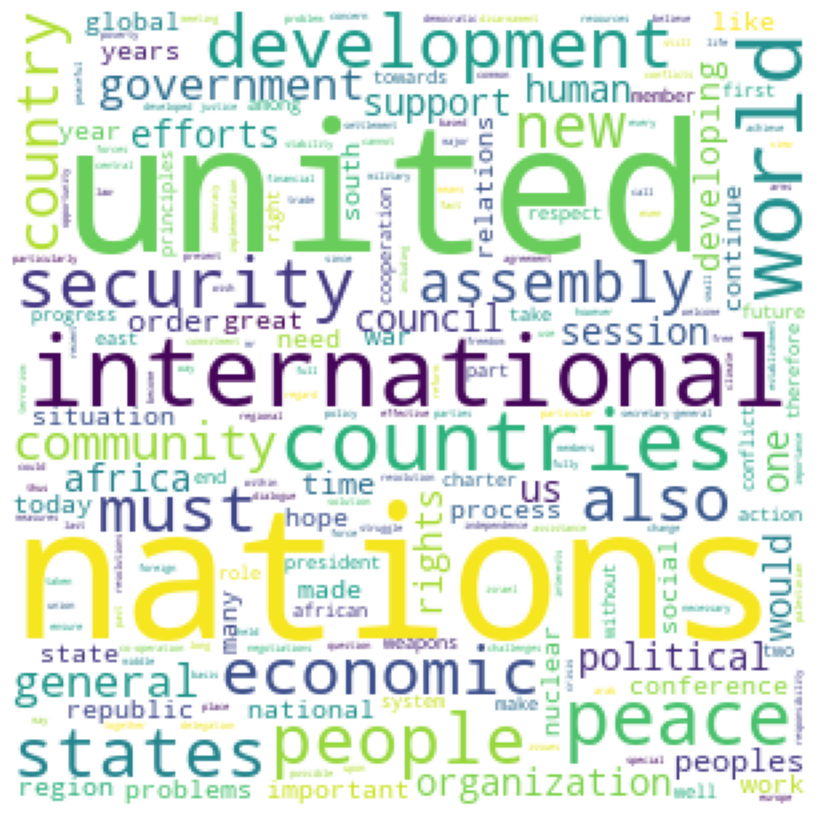

In [8]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 300, height=300, 
margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## TFIDF
Following are the steps to perform TFIDF for comparision

In [9]:
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
 # count tokens
    counter = Counter()
    df[column].map(update)
# create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

In [10]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()


,freq,tfidf
token,,
nations,124508,12649.986284
united,120763,12285.608632
international,117223,12364.276226
world,89421,9503.708982
countries,85734,10888.485986


## Perform the word cloud for the above data

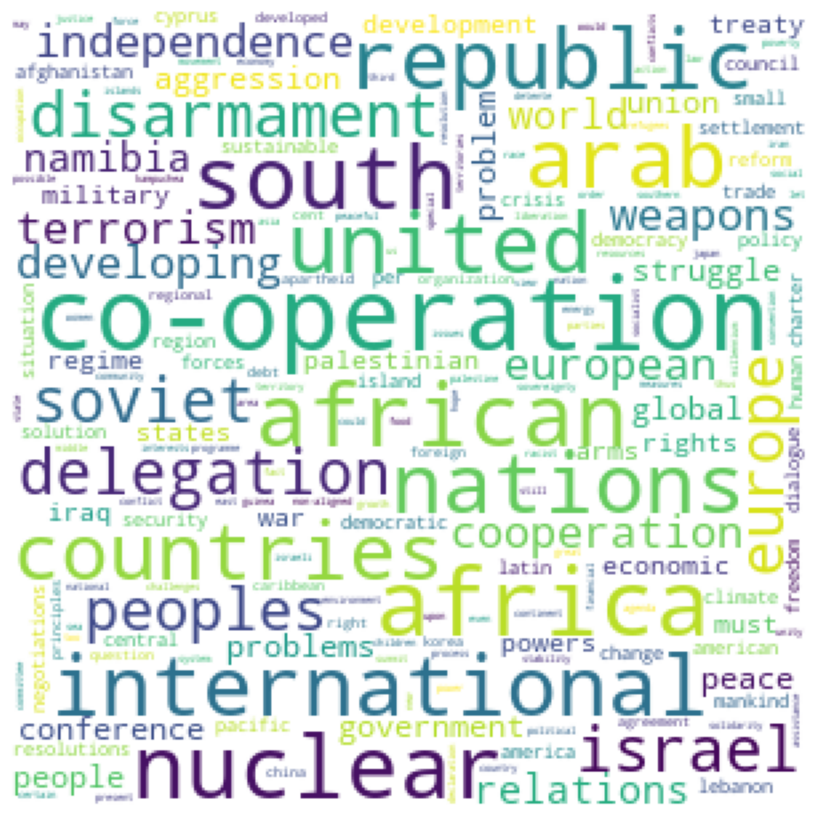

In [11]:
wc = WordCloud(background_color='white', width = 300, 
height=300, margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


## Function to count the keywords

In [12]:
df['num_tokens'] = df['tokens'].map(len)
def count_keywords(tokens, keywords): 
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]


## Function to group by year

In [13]:
def count_keywords_by(df, by, keywords, column='tokens'):
 
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps in the index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
 
    return freq_df.groupby(by=by).sum().sort_values(by)

## Perform the heatmap 
This heatmap provides a visual representation that allows analysts to quickly discern patterns or trends in the usage of specific keywords over time.

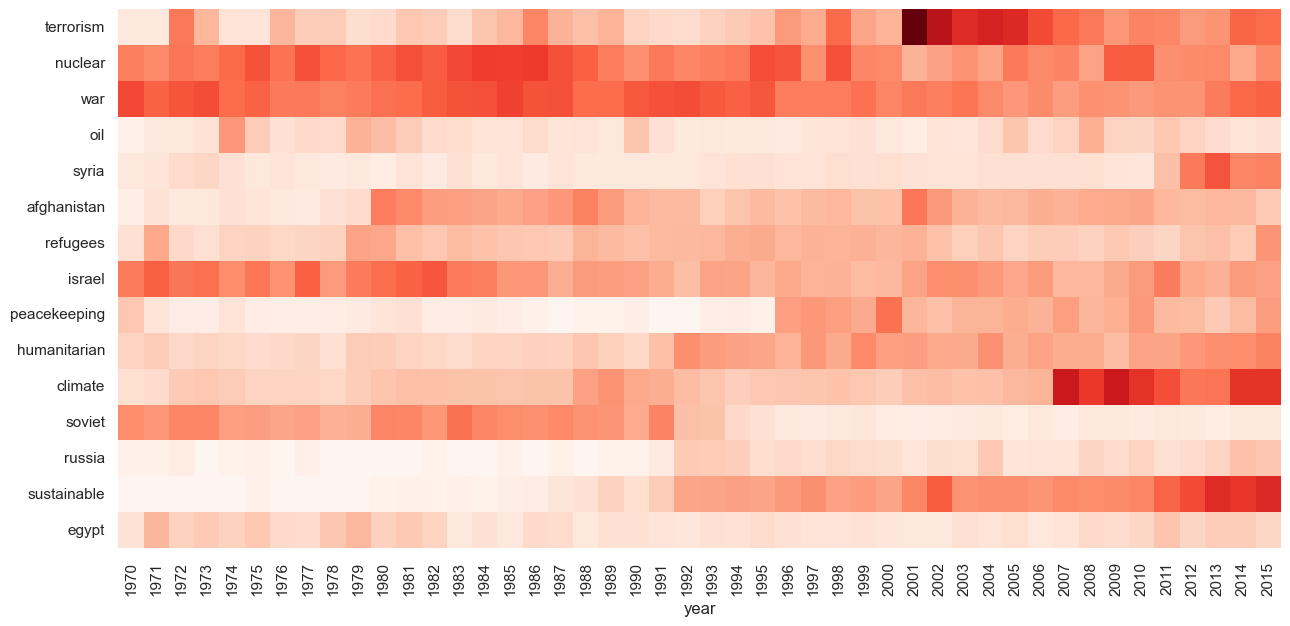

In [14]:
import seaborn as sns
keywords = ['terrorism', 'nuclear', 'war', 'oil','syria', 'afghanistan', 'refugees', 'israel', 'peacekeeping', 'humanitarian', 'climate', 'soviet','russia', 'sustainable','egypt'] 
freq_df = count_keywords_by(df, by='year', keywords=keywords)

# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('year')['num_tokens'].sum(), axis=0)

# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7)) 
sns.set(font_scale=1) 
sns.heatmap(data=freq_df.T, xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)